# Assignment 1.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdataanalysis2020/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 2nd, 2020 at 23:55. Hand in your files via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday March 9th, 2020 at 23:55.

## Setting up the data and packages

Relevant packages are loaded. The data is read using the pandas package. Proper types for columns such as "Date" and "Time" should be converted to an appropriate data format. Useful data are added to the data frame such as year, month, day and hour, this avoids redundancy in the code. Finally, X and Y are renamed to longitude and latitude, respectivly, to avoid confusion.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

#Setting seaborn styled plots
sns.set(style='darkgrid', palette='muted', color_codes=True)

In [2]:
#path="data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"
path="C:\\Users\\Christian\\Desktop\\Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"
df = pd.read_csv(path)

#Converting data to datetime format
df["Date"]=pd.to_datetime(df["Date"])
#Converting time to timedelta format
df.Time=pd.to_timedelta(df["Time"]+':00')
#Renaming X and Y to corresponding longitude and latitude
df.rename(columns={"X":"Lon", "Y": "Lat"}, inplace = True)

#Adding columns of year, month, day and hour
df=df.assign(Year=df["Date"].dt.year)
df=df.assign(Month=df["Date"].dt.month)
df=df.assign(Day=df["Date"].dt.dayofweek)
df=df.assign(Hour=df.Time.dt.components['hours'])
df=df.assign(Minute=df.Time.dt.components['minutes'])

## Part 1: Temporal Patterns

### Comments are after the graphs for less scrolling

We look only at the focus-crimes in the exercise below.

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 
                   'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 
                   'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 
                   'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
df_focus = df[df["Category"].isin(focuscrimes)]

>*Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year). In this exercise, please generate the visualizations described below. 
>* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?

In [4]:
weekly_crime=df_focus.groupby(["Category","Day"]).count()["IncidntNum"]

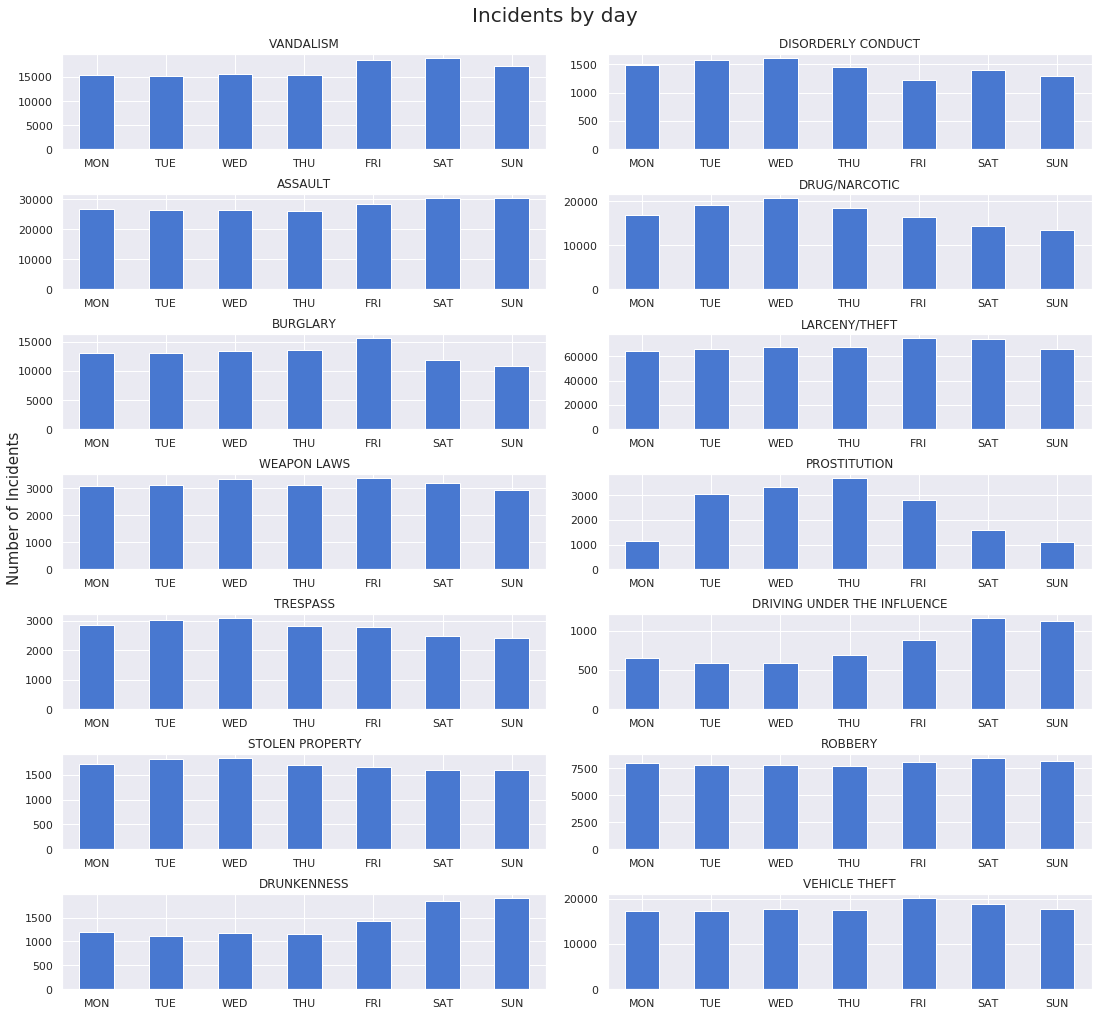

In [5]:
days=['MON','TUE','WED','THU','FRI','SAT','SUN']

fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(15,14), constrained_layout=True)
y=0
x=0
fig.text(0, 0.5, 'Number of Incidents', ha='center', va='center', rotation='vertical',fontsize=15)
for i, crime in enumerate(focuscrimes):
    weekly_crime[crime].plot.bar(ax=axes[x,y])
    axes[x,y].set_title(crime)
    axes[x,y].set_ylabel('')
    axes[x,y].set_xticklabels(days, rotation=0)
    axes[x,y].set_xlabel('')
    x+=1
    if i ==6:
        y+=1
        x = 0
fig.suptitle('Incidents by day', fontsize=20)
plt.show()

#### *Comment*

We see a large increase in `PROSTITUTION` during the mid-week (more than triple what we see on Sunday and Monday). 

Another interesting increase is `DRIVING UNDER THE INFLUENCE`, where the incidents increase in the weekend, there could be a correlation with `DRUNKENNESS`, which also increase in the weekends.

Other weekly patterns seem to emerge, like the increase of `VANDALISM` incidents during the weekend, however they are not as pronounced and as easily-explainable as the ones we already highlighted.

>* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [6]:
monthly_crime=df_focus.groupby(["Category","Month"]).count()["IncidntNum"]

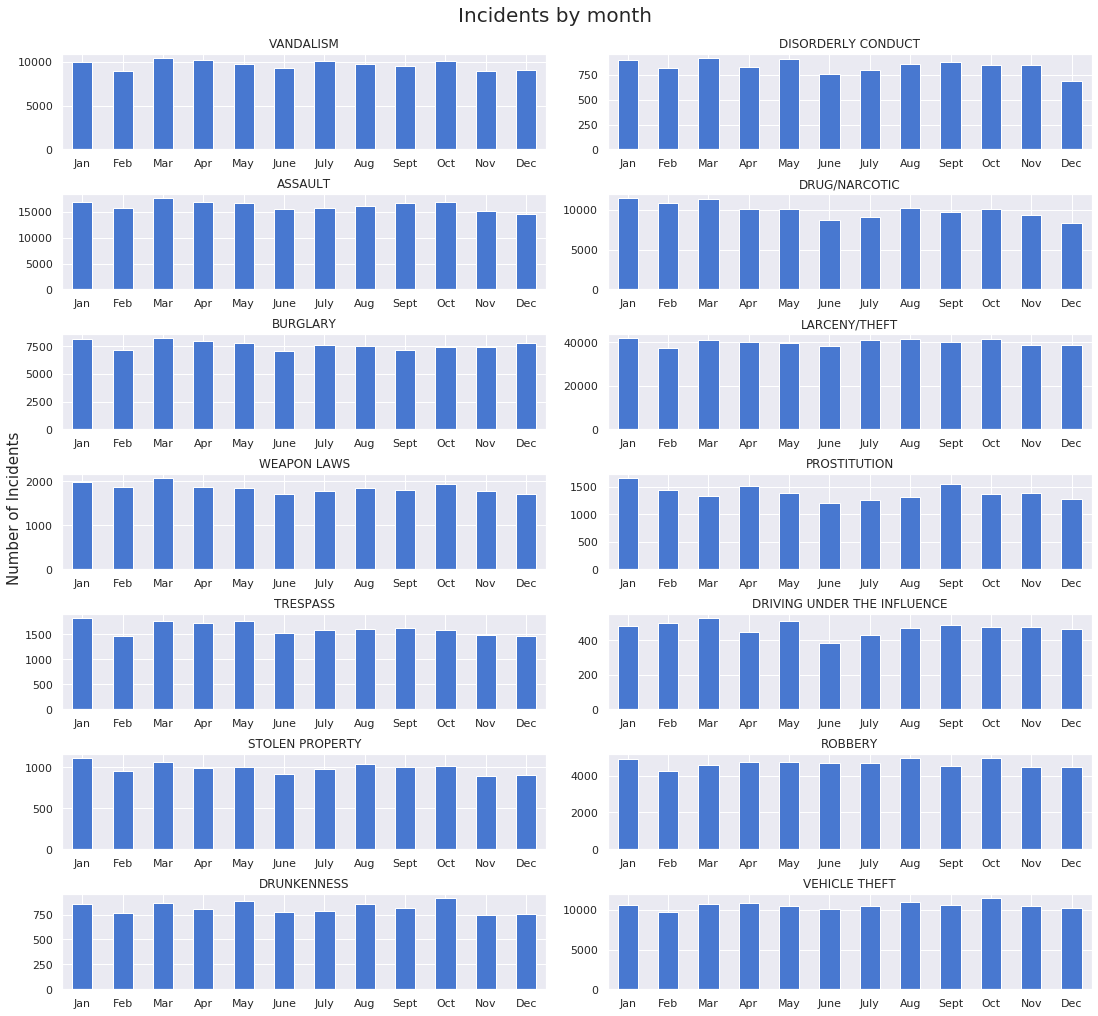

In [7]:
months=["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(15,14), constrained_layout=True)
y=0
x=0
fig.text(0, 0.5, 'Number of Incidents', ha='center', va='center', rotation='vertical',fontsize=15)
for i, crime in enumerate(focuscrimes):
    monthly_crime[crime].plot.bar(ax=axes[x,y])
    axes[x,y].set_title(crime)
    axes[x,y].set_ylabel('')
    axes[x,y].set_xlabel('')
    axes[x,y].set_xticklabels(months, rotation=0)
    x+=1
    if i ==6:
        y+=1
        x = 0
fig.suptitle('Incidents by month', fontsize=20)
plt.show()

#### *Comment*

A surprise here is to see that there seem to be less incidents during summer, especially incidents with `DRIVING UNDER THE INFLUENCE`. There also seem to be a decrease during Christmas for quite a few of focus crimes, `DISORDERLY CONDUCT` and `DRUG NARCOTIC`, however besides that most incidents seem to fairly stationary, regardless of the month.

One thing to keep in mind is that February will always appear as though it has a lower number of incidents because it has less days. One way to address this issue is to normalize the data by the number of days in the month, getting the number of crimes per day during that month. However this is not what is asked by the question, so we decided to keep the output as it is now.

>* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

In [4]:
hourly_crime=df_focus.groupby(["Category","Hour"]).count()["IncidntNum"]

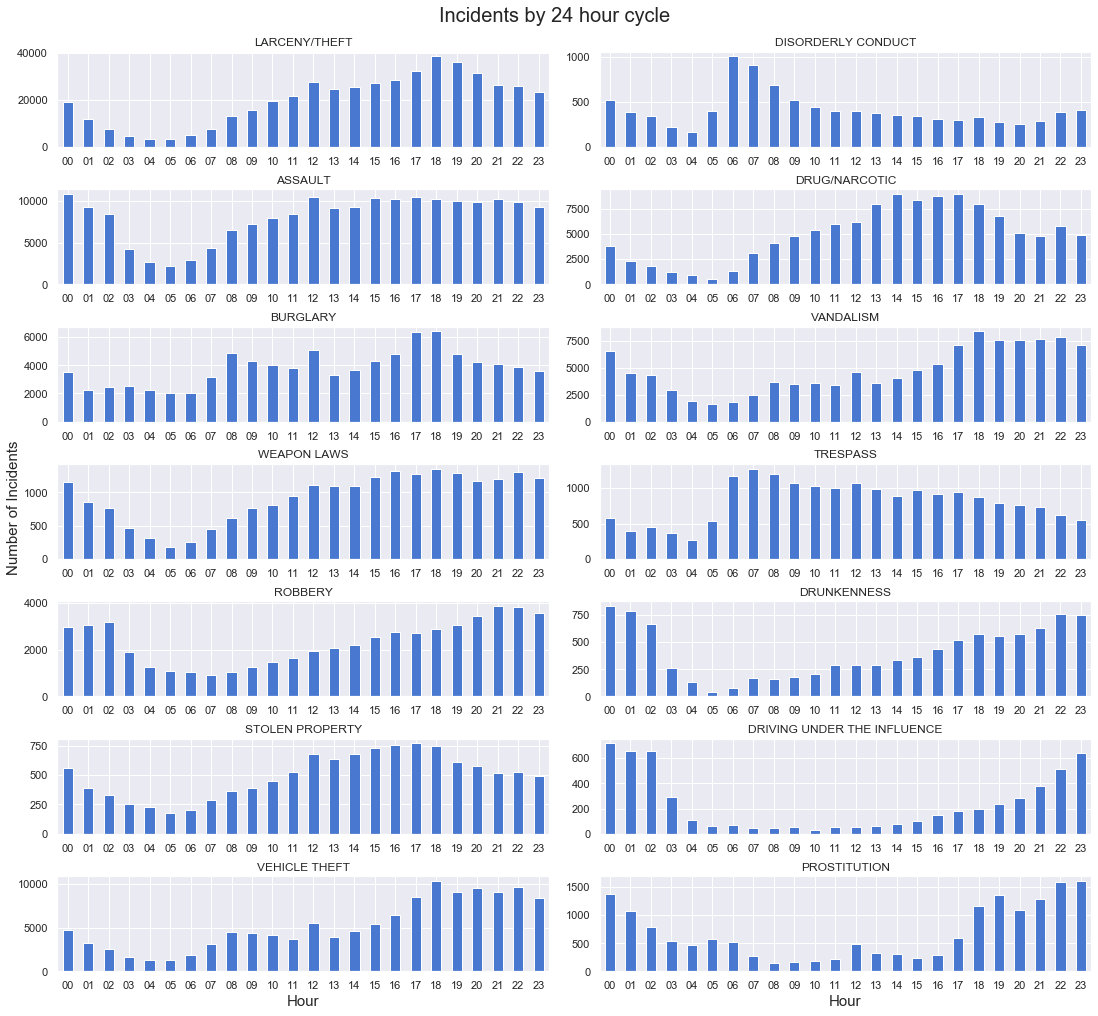

In [6]:
hours = ["0"+str(i) for i in range(10)] + [str(i) for i in range(10,24)]

fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(15,14), constrained_layout=True)
y=0
x=0
fig.text(0, 0.5, 'Number of Incidents', ha='center', va='center', rotation='vertical',fontsize=15)
for i, crime in enumerate(focuscrimes):
    hourly_crime[crime].plot.bar(ax=axes[x,y],rot=0)
    axes[x,y].set_title(crime)
    axes[x,y].set_ylabel('')
    axes[x,y].set_xlabel('')
    axes[x,y].set_xticklabels(hours, rotation=0)
    if (i == 6) | (i == 13):
        axes[x,y].set_xlabel("Hour", fontsize=15)
    x+=1
    if i ==6:
        y+=1
        x = 0
fig.suptitle('Incidents by 24 hour cycle', fontsize=20)
plt.show()

#### *Comment*

It is seen that most crimes are low in the early morning, around 04:00-06:00, this makes sense, as most people are sleeping during those hours and it is too close to wake-up hours to have enough time to commit crimes such as stolen property. 

A lot of crimes such as `DRIVING UNDER THE INFLUENCE`, `DRUNKENNESS`, `PROSTITUTION`, `VEHICLE THEFT` and `ROBBERY` occur during late evening/night, the night gives an excellent cover for robbing people and theft, the same applies to prostitution and most people get influenced by drugs or alcohol during nighttime. Burglary seem to have its prime time around 17-18. This is when people get home from work, to the surprise there has been a breaking, which might explain the sharp rise in incidents during those periods.

Another interesting pattern is the sharp increase in `DISORDERLY CONDUCT` at 6 in the morning, likely related to people starting to wake up and getting annoyed by noisy drunks or drug abusers.

>* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [10]:
hotw_crime=df_focus.groupby(["Category","Day","Hour"]).count()["IncidntNum"]

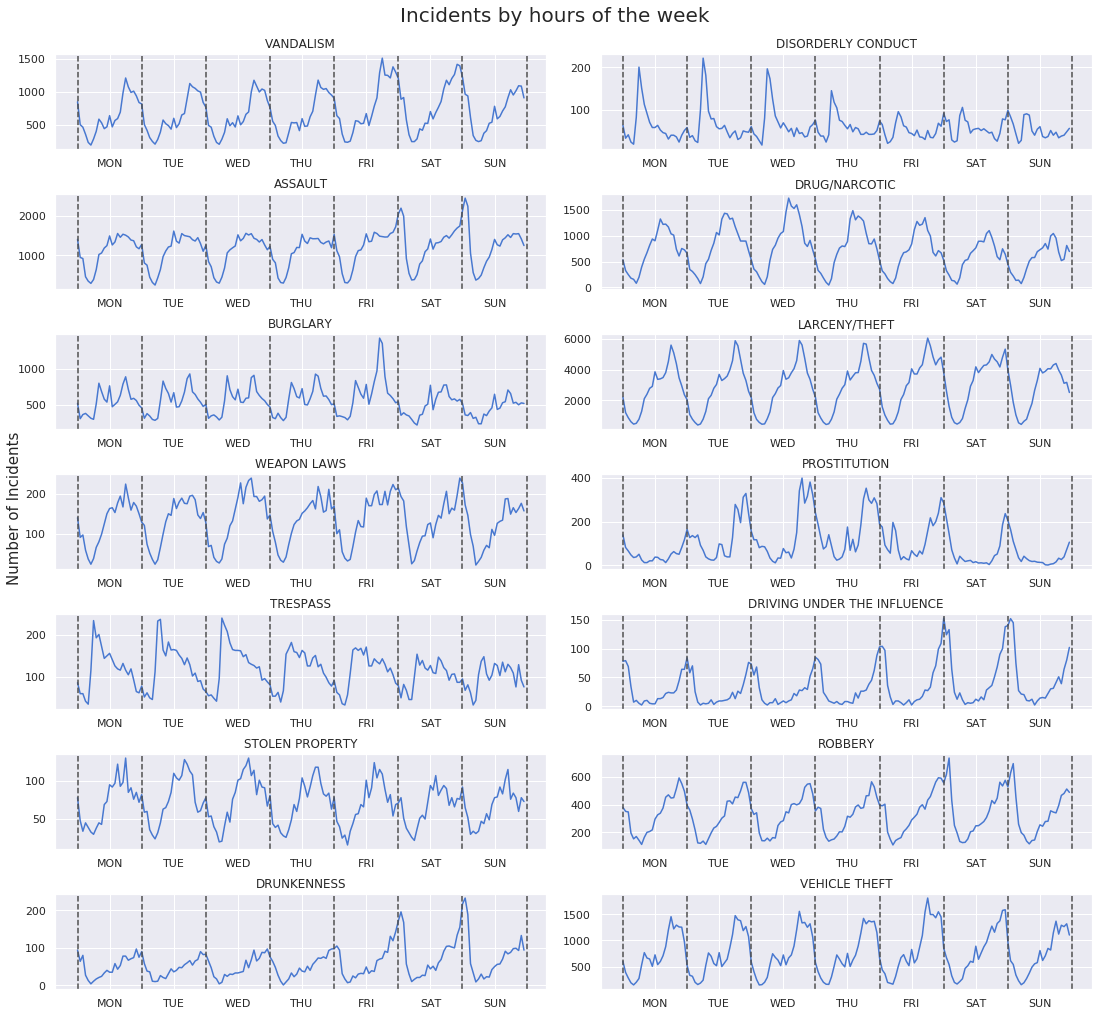

In [11]:
fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(15,14), constrained_layout=True)
y=0
x=0
fig.text(0, 0.5, 'Number of Incidents', ha='center', va='center', rotation='vertical',fontsize=15)
for i, crime in enumerate(focuscrimes):
    hotw_crime[crime].plot(ax=axes[x,y],rot=0)
    axes[x,y].set_title(crime)
    axes[x,y].set_ylabel('')
    axes[x,y].set_xlabel('')
    for j in 24*np.array([0,1,2,3,4,5,6,7]):
        axes[x,y].axvline(j, color =(0.3,0.3,0.3), ls="--") 
    axes[x,y].set_xticks(24*np.array([0,1,2,3,4,5,6])+12)
    axes[x,y].set_xticklabels(days, rotation='horizontal')
    x+=1
    if i ==6:
        y+=1
        x = 0
fig.suptitle('Incidents by hours of the week', fontsize=20)
plt.show()

#### *Comment*

Here we see the periodic behaviour of incidents for each focus crime. Compared to the first plot in part 1, this gives more information, we not only see the day of the crime but also the time of it. A few strange behaviours are seen, such as the spike in `BURGLARY` and the large mid-week increase in `PROSTITUTION`, which is something that was also observed in Canada ([Prostitution offences in Canada: Statistical trends](https://www150.statcan.gc.ca/n1/pub/85-002-x/2016001/article/14670-eng.htm)) . It is also strange to see the high spikes of `DISORDERLY CONDUCT` during Mondays, Tuesdays and Wednesdays.

`ASSAULT`, `ROBBERY`, `DRUNKENNESS`and `DRIVING UNDER THE INFLUENCE` all see an increase during the weekend.

## Part 2: Thinking about data and visualization

>*Excercise:* Questions for the [first video lecture](https://www.youtube.com/watch?v=9D2aI30AMhM).
>* What is the difference between *data* and *metadata*? How does that relate to the bike-example?

Data referes to the informative content, which, without context, could mean anything that can be used to derive information. Metadata is the description of a collection of data and provides meaning to the data that can be used by someone who has no prior knowledge of it. In the bike example the data is the altitude, the longitude and latitude, the time when all these measurements were taken, the metadata is embedded in the markup. For example, `<time>` indicates the time where the `<trkpt>` (track point) was measured and all the track points are part of a `<trkseg>`, a track segment. By just reading the name of the tags we can know what the numbers of words inside them mean.

> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult.

We agree with Sune that the human eye is great at measuring data and finding useful information from it. This is because we are constantly trained in looking for patterns, which, in turn, means that we are also very good at spotting outliers. The human eye does so in a very intuitive way, thanks to millennia of evolution that equipped us with a brain capable of using the data collected by the sensors we have on our eyes and merging it with pre-existing knowledge to achieve an immediate understanding of the trend of a set of points or a grouping of different classes (some of the 7 Gestalt principles).

What instead is difficulty for the human eye is looking for detail that is unexpected. When we see a pattern immediately, we tend to stick with it, unless something suggests otherwise. Spot-the-difference games are an example of task that is difficult for the human eye. The reason is that when we are looking at two images that are mostly the same, and we are provided with no clue to see where the differences are, the eyes here are struggling to find something different from the obvious patterns. In order to find the differences we will have to fall back to a systematic search of the entire image until we find them all.

> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

A naive example of the Simpson's paradox would be gender bias in the workplace. If we assume that in Denmark the jobmarket consists of 50% women and 50% men. We could say that there is no gender bias in the jobmarket. But if we look at different sectors such as truck drivers or nurses we can see that the ratio is bias against either gender in those sectors. 
This is an example of how a trend appears in severeal different groups of data but disappears when these groups are combined.

> * In your own words, explain the difference between *exploratory* and *explanatory* data analysis. 

* `Exploratory` data analysis is when you explore the data. You have a general idea of how the data is gathered and what it aimed to describe even though you can not yet explain how the observed data represents the phenomena being measured or monitored. This involves e.g. outlier detection through visualisation and calculation of general statistics.
* `Explanatory` data analysis aimes to explain the data. You have good knowledge of the data and you wish to present it to a given audience. You utilize visualisation methods and compute relevant statistics that you have found to be most descriptive to intuitively get your point accross.

>*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
>* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

The **Pearson correlation coefficient** is a statistic which measures the linear correlation between two variables $X$ and $Y$. The coefficent ranges from -1, when there is a strong negative linear correlation, to 1, when there is a strong positive linear correlation. Strong positive linear correlation meaning that the points fit a linear line and that if we observe an above average value of *X* we most likely have a corresponding above average value of *Y* in that observation. Strong negative linear correlation means that the points fit a linear line and that a high value of *X* implies a low value of *Y* and vice versa. 0 represent no linear correlation impling that *X* tells us nothing about *Y* and vice versa.
The formula for the Pearson correlation coefficient referred to as $\rho_{X,Y}$ is given by:

$$\rho_{X,Y}=\cfrac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}, $$ 

where:
 * $\text{cov}$ is the covariance
 * $\sigma_X$ is the standard deviation of X
 * $\sigma_Y$ is the standard deviation of Y
    
An example where the Pearson correlation fails as a statistic to give an accurate description of the data  would be the *Anscombe's quartet* which Sune had us illustrate in *week 2* of this course. As the name implies it consists of four different datasets that were constructed by Francis Anscombe. He created them to demonstrate the importance of graphing data before analyzing it and the effect of outliers. More on this link [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). 

> * What is the difference between a bar-chart and a histogram?

The fundamental difference between histogram and bar graph will help you to identify the two easily is that there are gaps between bars in a bar graph but in the histogram, the bars are adjacent to each other. 
 * `Histogram` displays data using bars to show the frequency of numerical data by binning it. It indicates the distribution of non-discrete variables and presents quantitative data. Bars usually touch each other because elements are grouped together based on ranges. The bars cannot be place in any random order.
 * `Bar-Chart` is a pictorial representation of data that uses bars to compare different categories of data and as such compares discrete variables of categorical data. Elements ar taken as individual entities belonging to a category. In a bar-chart, usually bars do not touch and can be reordered in any desired way.
  - [reference](https://keydifferences.com/difference-between-histogram-and-bar-graph.html)
  
> * I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.

Scott's rule defines the width of the bins as:

$$
3.5 \cfrac{\sigma}{\sqrt[3]{n}}
$$

Where $n$ is the sample size and $\sigma$ is the estimate of the standard deviation obtained from approximating also the mean using the data available.

Scott's rule asymptotically (as $n \rightarrow \infty$) minimizes the mean squared error between the true distribution and the distribution shown by the histogram (the mean-integrated-squared-error MISE) when we assume the true distribution to be Gaussian.  
Referencing *Scott, D. W. (2010). Scott's rule. Wiley Interdisciplinary Reviews: Computational Statistics, 2(4), 497-502.*



## Part 3: Generating important plot types

>*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

>* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

In [10]:
df_rob = df[df['Category']=='ASSAULT'][['Date','Time','Hour']]
mask = (df_rob['Date'] >='01/01/2016') & (df_rob['Date'] <= '06/30/2016') & (df_rob['Hour']==13)
df_rob=df_rob.loc[mask]

In [11]:
# Convert to minutes
df_rob=df_rob.sort_values(by=['Time'])
df_rob['Time'] = df_rob['Time'].astype(str).str[-18:-10]
df_rob['Time'] = df_rob['Time'].astype(str).str[0:-3]

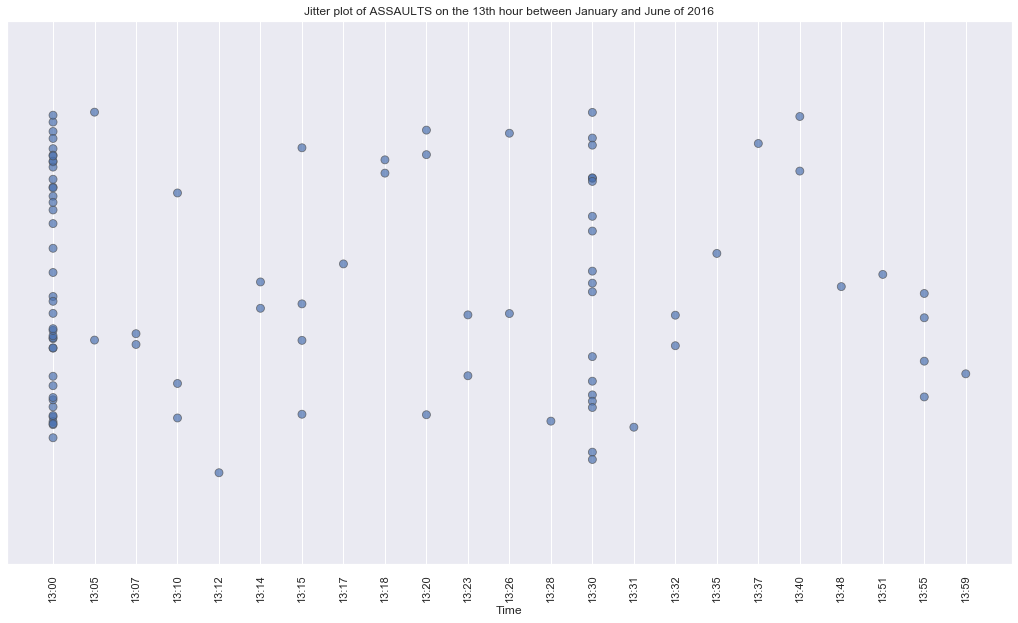

In [12]:
#plot jitter
sns.set(rc={'figure.figsize':(18,10)})
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Jitter plot of ASSAULTS on the 13th hour between January and June of 2016")
ax = sns.stripplot(x=df_rob['Time'], jitter=True, alpha=0.7, size=8, linewidth=0.8)
ax.set_ylim(-0.15,0.15)
ax.set_xlabel("Time")
ax.tick_params( rotation = 90)

*Comment*

We notice an increased frequency of incidents at the hour-mark, half-hour-mark and then the 15 minutes and 25 minutes mark. Very often policemen note down an approximate time.

>* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
>  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 
  

*We picked PROSTITUTION and WEAPON LAWS  to work with on this exercise as we found them to represent different geographical patterns.*

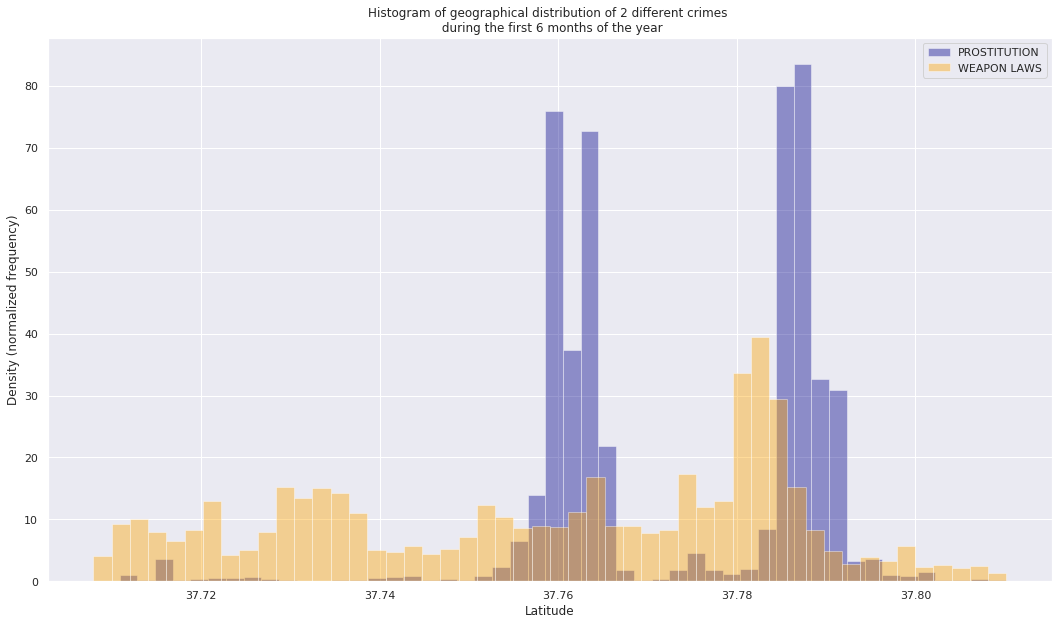

In [8]:
#get our data
crimes = ['PROSTITUTION', 'WEAPON LAWS']
df_hist =df[df['Category'].isin(crimes)][['Category', 'Date', 'Month', 'Lon', 'Lat']]
df_hist = df_hist.loc[df_hist['Lat']<=50]
df_prost = df_hist[(df_hist['Category'] == 'PROSTITUTION') & (df_hist['Month']<=5)]
df_weapon = df_hist[(df_hist['Category'] == 'WEAPON LAWS') & (df_hist['Month']<=5)]
fig = plt.figure(figsize = (18,10))
plt.title("Histogram of geographical distribution of 2 different crimes \n during the first 6 months of the year")
sns.distplot(df_prost['Lat'], norm_hist = True, color = "darkblue", bins = 50, kde = False, label="PROSTITUTION")
sns.distplot(df_weapon['Lat'],norm_hist = True, color = "orange",   bins = 50, kde = False, label='WEAPON LAWS')
plt.ylabel('Density (normalized frequency)')
plt.xlabel('Latitude')
plt.legend()
plt.show()

*Comment*

We notice that `PROSTITUTION` has 2 spikes, at around $37.76$ and $37.79$ latitude, while `WEAPON LAWS` only has a small spike around $37.78$. The second spikes in `PROSTITUTION` is in correspondance of the major city, but the first one is due to the very high prostitution activity in the `Mission` district.

>* Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

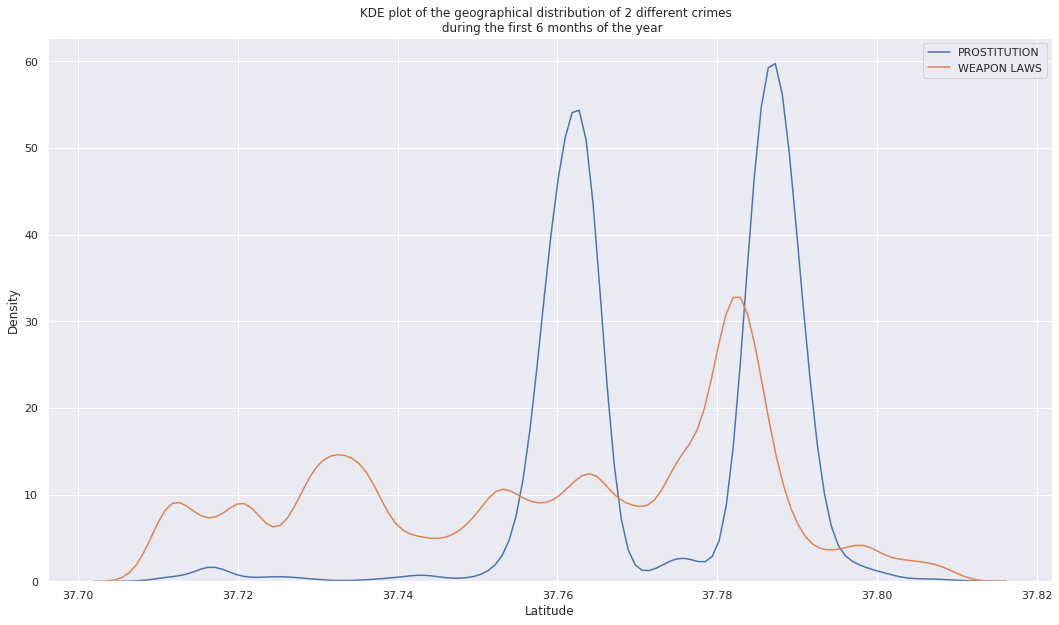

In [38]:
fig = plt.figure(figsize = (18,10))
plt.title("KDE plot of the geographical distribution of 2 different crimes  \n during the first 6 months of the year")
sns.kdeplot(df_prost['Lat'], label='PROSTITUTION', bw = 0.002)
sns.kdeplot(df_weapon['Lat'], label='WEAPON LAWS', bw = 0.002)
plt.ylabel('Density')
plt.xlabel('Latitude')
plt.legend()
plt.show()

*Comment*

The density function seems to be similar to the one represented using the histogram using an appropriate size of kernel.

>* Finally, grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 

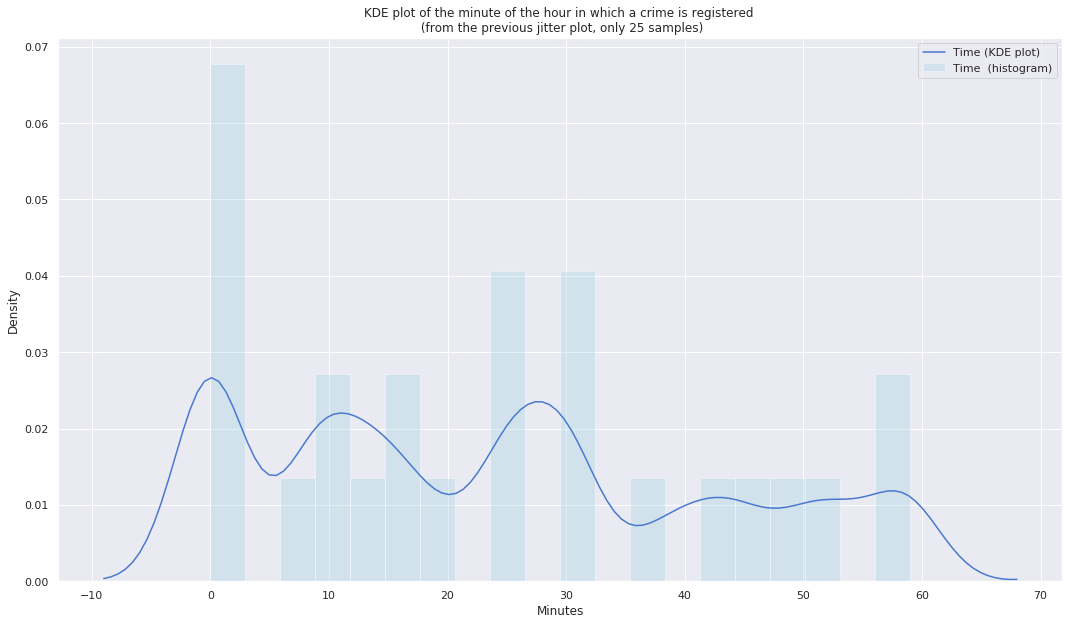

In [52]:
fig = plt.figure(figsize = (18,10))
plt.title("KDE plot of the minute of the hour in which a crime is registered \n (from the previous jitter plot, only 25 samples)")
sns.kdeplot(df_rob.sample(25,random_state =  1)['Minute'],  label='Time (KDE plot)', bw = 3)
sns.distplot(df_rob.sample(25,random_state =  1)['Minute'], norm_hist = True, color = "lightblue", bins = 20, kde = False, label="Time  (histogram)")
plt.ylabel('Density')
plt.xlabel('Minutes')
plt.legend()
plt.show()

*Comment*

We apply this experiment at the original data used in the jitter plot and we see that, when plotting using an histogram we can clearly see the lack of data, while with a KDE plot it just looks like we have an almost uniform distribution of the time at which crimes happen.

Using KDEs hides some information that could easily be seen with an histogram, KDE tends to fake the presence of data that is not actually there.

We apply it also at the geographical data to have further confermation of the effects of applying KDE to a small dataset.

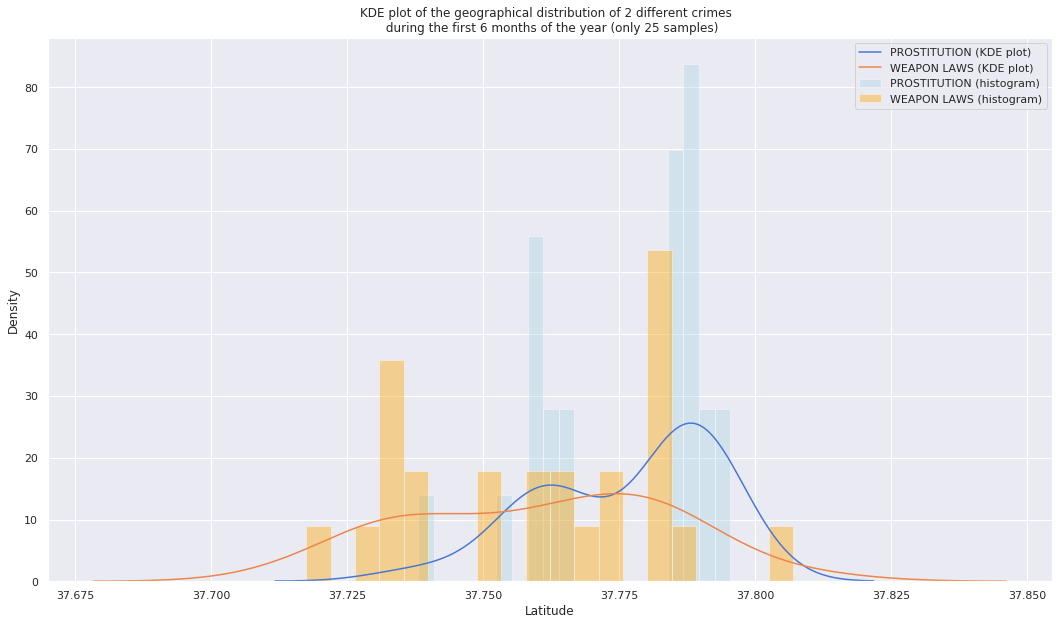

In [53]:
fig = plt.figure(figsize = (18,10))
plt.title("KDE plot of the geographical distribution of 2 different crimes  \n during the first 6 months of the year (only 25 samples)")
sns.kdeplot(df_prost.sample(25,random_state =  1)['Lat'],  label='PROSTITUTION (KDE plot)')
sns.kdeplot(df_weapon.sample(25,random_state =  1)['Lat'], label='WEAPON LAWS (KDE plot)')
sns.distplot(df_prost.sample(25,random_state =  1)['Lat'], norm_hist = True, color = "lightblue", bins = 20, kde = False, label="PROSTITUTION (histogram)")
sns.distplot(df_weapon.sample(25,random_state =  1)['Lat'],norm_hist = True, color = "orange",   bins = 20, kde = False, label='WEAPON LAWS (histogram)')
plt.ylabel('Density')
plt.xlabel('Latitude')
plt.legend()
plt.show()

*Comment*

The results are pretty different and illustrates how the KDE can be misleading. If the bandwith is not carefully chosen we risk either overrepresenting or underrepresenting our data. The kernel hides the fact that we don't have much data at all to support our claims, the graph looks just as good and promising as the previous one that was using thousands more datapoints.

## Part 4: Heatmaps of geo-data

>*Exercise*: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials). 

>Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

>* First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude.

In [7]:
lat= 37.773972
lon= -122.431297

folium.Map([lat, lon], zoom_start=13);

![map5_1](https://raw.githubusercontent.com/s146996/Social-Data-Analysis/master/map5_1.png)

Since we will use the base map a lot of times, a generate function is implemented:

In [8]:
def generateBaseMap(default_location=[37.773972,-122.431297], default_zoom_start=13, 
                    default_tiles='OpenStreetMap'):
    
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start,
                          tiles=default_tiles)
    return base_map

>* Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).

In [7]:
base_map=generateBaseMap(default_tiles="Stamen Toner")

#marker location
city_hall_loc = [37.77919, -122.41914]

#We add the marker to the base_map
folium.Marker(city_hall_loc, icon=folium.Icon(color='blue'), popup='City Hall').add_to(base_map)
base_map

NameError: name 'generateBaseMap' is not defined

![map5_2](https://raw.githubusercontent.com/s146996/Social-Data-Analysis/master/map5_2.png)

>* Now, let's plot some more data (no need for popups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a *point scatter plot*.

In [10]:
#Selecting the DRUG/NARCOTIC category
df_drug=df[df["Category"]=="DRUG/NARCOTIC"]

#Selecting the rows where year=2016 and choose June and July 
df_drug=df_drug[(df_drug.Year == 2016)&(df_drug.Month >= 6) & (df_drug.Month <= 7)]

#Get the latitude and longitude
df_drug=df_drug[["Lat","Lon"]].values

base_map=generateBaseMap()
#Iterate over each coordinate to plot a circlemarker
for coord in df_drug:
    folium.CircleMarker(coord,radius=1,color='black').add_to(base_map)

base_map

![map5_3](https://raw.githubusercontent.com/s146996/Social-Data-Analysis/master/map5_3.png)

------
>* Next, let's play with **heatmaps**. You can figure out the appropriate commands by grabbing code from the main [tutorial](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data)) and modifying to suit your needs.
>   * To create your first heatmap, grab all arrests for the category `'SEX OFFENSES, NON FORCIBLE'` across all time. Play with parameters to get plots you like.

We select the category `SEX OFFENSES, NON FORCIBLE` and find all resolutions containing the word `ARREST`. When the correct data has been selected, the latitude and longitude coords are extracted.

In [12]:
df_heat=df[(df['Category']=='SEX OFFENSES, NON FORCIBLE') & (df["Resolution"].str.contains("ARREST"))]
df_heat=df_heat[["Lat","Lon"]].values

Now the heat map can be created using the HeatMap function of the Folium package.

In [13]:
base_map=generateBaseMap()
HeatMap(data=df_heat, radius=20, blur = 14, max_zoom=15, min_opacity=0.5).add_to(base_map)
base_map

![map5_4](https://raw.githubusercontent.com/s146996/Social-Data-Analysis/master/map5_4.png)

  > * Now, comment on the differences between scatter plots and heatmaps. 
  >    - What can you see using the scatter-plots that you can't see using the heatmaps? 
  >    - And *vice versa*: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?
      

In the *scatter plot* it is very easy to visualize exact locations of events. In the heat map the density of an isolated data point might span a fairly large spatial location on the map, giving a wrong impression of the data. This does not occur in the scatter plot as each data point is visualized equally without any density. Therefore scatter plots are better at visualizing outliers, as the outliers will only be visible at the exact location.

*Heatmaps* allow one to see densities of data points in a spatial location. This means, that when multiple data points are clustered close to each other, the heat map will show the density of the cluster. In the scatter plot the clustered data points might overlap hiding some of the data points, information is then lost, which is instead retained by the heatmap based on the intensity of the colors generated by the density of the heatmap. Another benefit of the heatmaps is that they easily give an overview of the hotspots, giving a quick overview of the entire dataset.

  > * Play around with the various parameter for heatmaps. You can find a list here: https://python-visualization.github.io/folium/plugins.html

In [6]:
base_map=generateBaseMap()
HeatMap(data=df_heat, radius=10, blur = 13, max_zoom=10, min_opacity=0.5,
        gradient={0.2: 'red', 0.4: 'purple', 0.6: 'orange', 1: 'blue'}).add_to(base_map)
base_map

NameError: name 'generateBaseMap' is not defined

![map5_5](https://raw.githubusercontent.com/s146996/Social-Data-Analysis/master/map5_5.png)

>   * Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the `radius` and `max_zoom`).

`max_zoom`: intensity scales with zoom, which means that with a bigger max_zoom, the intensities of each point will be lower at a given zoom. Once the zoom is bigger than max_zoom the intensity of the points will not increase further.

`radius` determines the "size" of each point. With bigger size, points that are further away will fuse together, instead with a smaller size they will barely appear on the map.

`blur` this defines the amount of blur to each point. With small blur we get more defined points, each with high intensity, with high blur we get less defined points, a bigger area for each of the points, which results in a lower intensity.

`min_opacity` The minimum opacity the heat will start at. So a low value will make the heat be less opaque and a larger one will make it more.

`gradient` defines the color corresponding to the gradient of the density. The "edge" of the density will have a small gradient with the gradient increasing the closer to the peak one comes.

>For one combination of settings, my heatmap plot looks like this.
![maps](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png)
>   * In that screenshot, I've (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words. 

All addresses seem to follow a pattern, this let us deduce that the data entry must be named "800 Block of BRYANT ST". Let us first take all the values containing "800 Block of BRYANT ST" and find the location. 

In [151]:
crime_bst=df[df["Address"].str.contains("800 Block of BRYANT ST")]

In [152]:
locations=crime_bst[["Lat","Lon"]]
locations.head(3)

Lat         Lon
0    37.775421 -122.403405
82   37.775421 -122.403405
168  37.775421 -122.403405

Now let's zoom in to the location where the crimes occur by using the zoom_start parameter of the base map function.

In [167]:
base_map=generateBaseMap(default_location=list(locations.iloc[[1]].values[0]),default_zoom_start=22)
base_map

![map5_7](https://raw.githubusercontent.com/s146996/Social-Data-Analysis/master/map5_7.png)

As we see the location is very close to the Hall of Justice, this is a court room and explains the number of incidents occurring at this address. One explanation could be that for some crimes the exact location is not known, and the hall of justice is recorded as being the place where these crimes happen because that is where they were reported. Just for the fun of it, let's take a look at the crimes around 800 Bryant Street.

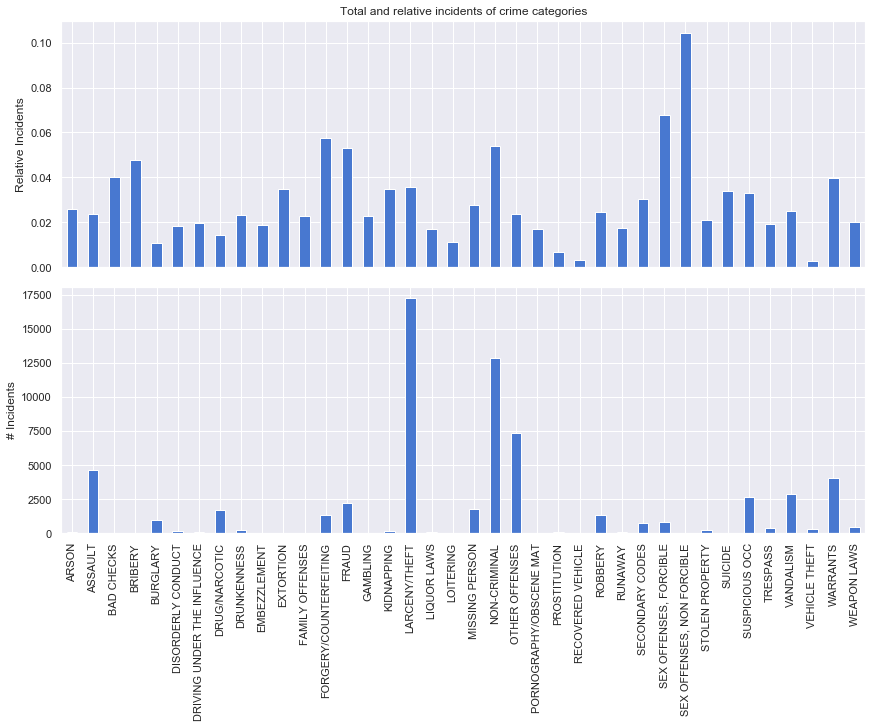

In [165]:
#fig=plt.figure(figsize=(12,5))
fig, axes=plt.subplots(nrows=2, ncols=1, figsize=(12,10), constrained_layout=True)
#relative incidents, we dived the number of incidents at 800 Bryant St with the total number of incidents.
plot_df=(crime_bst.groupby("Category")["IncidntNum"].count().div(df[df.Category != "TREA"].groupby("Category").count()["IncidntNum"]).plot(kind="bar",ax=axes[0]))
plot_df2=crime_bst.groupby("Category")["IncidntNum"].count().plot(kind="bar",ax=axes[1])
axes[0].set_title("Total and relative incidents of crime categories")
axes[1].set_ylabel('# Incidents')
axes[0].set_ylabel('Relative Incidents')
axes[0].set_xlabel('')
axes[0].set_xticklabels([])
axes[1].set_xlabel('')
plt.show()

*Comment*

We see a lot of larceny/theft, non-criminal, other-offenses incidents in the absolute number of incidents, but this number is not useful because these are also very common crimes. 

Looking at the relative crimes is more informative, here it is seen that this single location accounts for around 2-4% of all incidents for a lot of the categories, and for some, around 6-10% of all the incidents. This is a fairly large number of incidents for a single address, clearly indicating the hotspot.

In the case of sex-offenses, the Hall of Justice is used much more compared with other crimes. This could be due to the victim not wanting to share details or the police force protecting children's identity.

---

>*Exercise*: Heat map movies. This exercise is a bit more independent than above - you get to make all the choices.

>* Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).

In previous exploration it was seen that the crime type `DRUNKENNESS` had a decent amount of data points. One should imagine that the incidents of drunkenness starts to increase around late evening as people start going out to party. Let us visualize it!

In [3]:
df_time=df[(df["Category"]=="DRUG/NARCOTIC")][["Hour","Lat","Lon"]]

>* Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.

We want to look at what time incidents of `DRUNKENNESS` occur the most based on the visualization. An hourly time-resolution is chosen. First the time period is extracted (24-hours). Then each latitude and longitude for all `DRUNKENNESS` crimes in the given hour is extracted.

In [4]:
hours_sort = df_time.Hour.sort_values().unique()
crime_pr_hour = []

for i in hours_sort:
    crime_pr_hour.append(df_time[df_time.Hour==i][["Lat","Lon"]].values.tolist())

>* Create the movie using `HeatMapWithTime`.

In [9]:
base_map=generateBaseMap()
HeatMapWithTime(crime_pr_hour, speed_step=1).add_to(base_map)
base_map

![map5_6](https://raw.githubusercontent.com/s146996/Social-Data-Analysis/master/map5_6.png)
![map5_6_2](https://raw.githubusercontent.com/s146996/Social-Data-Analysis/master/map5_6_2.png)

>* Comment on your results: 
>  - What patterns does your movie reveal?
>  - Motivate/explain the reasoning behind your choice of crimetype and time-resolution. 

In the above frames the first frame is from 01:00 in the night and the second is at 05:00 in the morning. From the movie one can observe that incidents due to drunkenness mainly occur in peak hours when people have been out for some time, 22:00 to 03:00. After 03:00 a sharp decrease in incidents is observed, this is probably because most people have gone to bed. Incidents seem to remain low until 07:00. After 07:00 a steady increase can be observed until the peak hours 22:00 - 03:00. Intuitively it all makes sense, people can't drink when sleeping and most drinking occur in the late evening/night hours.

The reason the hourly time-resolution was chosen is to see the variation of drunkenness incidents during the day. Intuitively it would make great sense to see a large variation of incidents as people tend to drink more later in the day. This is also illustrated in the movie above. To investigate drunkenness is relevant as drunkenness may also lead to worse crimes, such as assault, therefore based on the movie a picture of hot spots is shown, so it is possible to take action in hot areas.

## Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

>We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

>1. In the hourly activity for `PROSTITUTION` something surprising is going on on Wednesday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
>1. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
>1. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png).

>*Exercise*: Data errors. The data errors we discovered above become invisible when we aggregate data. When we calculate mean values, statistics more generally. And when we visualize, they become difficult to notice when when we bin the data. We explore this process in the exercise below.

>This last exercise has two parts.
>* In each of the three examples above, describe in your own words how could the data-errors I call attention to above can biased the binned versions of the data and also briefly mention how it could create errors in how we understand what's going on in San Francisco and our modeling.
>* (Optional) Find your own example of human noise in the data and visualize it.

### Answers

1) To understand the spike in `PROSTITUTION` we first plot it again.

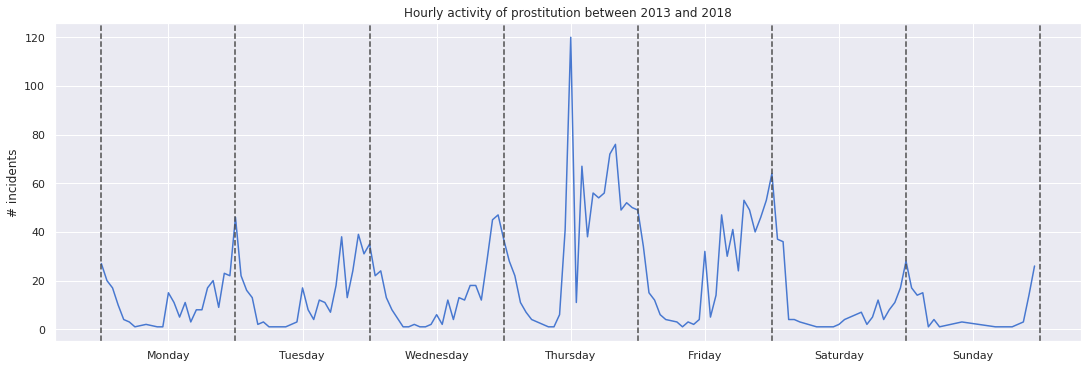

In [12]:
fig, axes = plt.subplots(figsize=(15,5), constrained_layout=True)
axes.set_title("Hourly activity of prostitution between 2013 and 2018")
hourly_data = df[(df["Category"] == "PROSTITUTION")&(df["Year"]>2012)]\
                .groupby(["Day", "Hour"], as_index=False)["IncidntNum"]\
                .count()\
                .values
x_values = hourly_data[:,0]*24+hourly_data[:,1]
axes.plot(x_values, hourly_data[:,2], label = "Number of incidents")

for x in 24*np.array([0,1,2,3,4,5,6,7]):
    axes.axvline(x, color =(0.3,0.3,0.3), ls="--") 
axes.set_ylabel("# incidents")
axes.set_xticks(24*np.array([0,1,2,3,4,5,6])+12)
axes.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation='horizontal')
plt.show()

Then we look specifically at Tuesday.

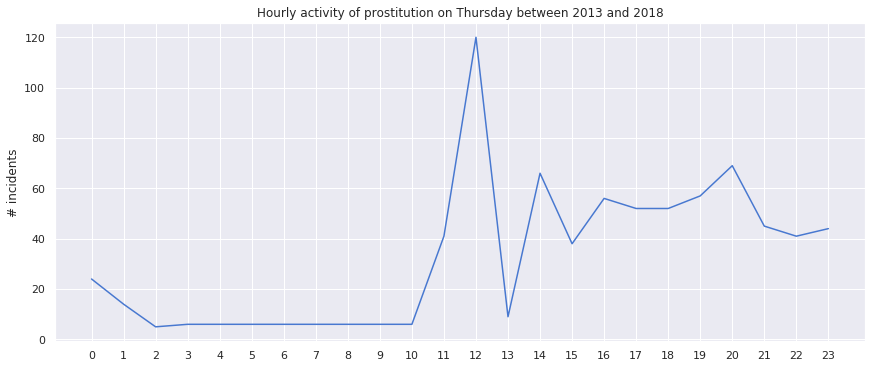

In [13]:
fig, axes = plt.subplots(figsize=(12,5), constrained_layout=True)
axes.set_title("Hourly activity of prostitution on Thursday between 2013 and 2018")
hourly_data = df[(df["Category"] == "PROSTITUTION")&(df["Year"]>2013)&(df["Day"] == 3)]\
                .groupby(["Day", "Hour"], as_index=False)["IncidntNum"]\
                .count()\
                .values
x_values = hourly_data[:,1]
axes.plot(x_values, hourly_data[:,2], label = "Number of incidents")

axes.set_ylabel("# incidents")
axes.set_xticks(range(24))
plt.show()

The spike in prostitution incidents recorded at 12:00 P.M. on a Thursday could be due to a policy between police workers that protects the privacy of the people involved by noting down a time of day that is different from the one when the incident actually happened.

This bias in the data could lead a predictive model into thinking that the efforts of the police departments should be focused on that day of the week compared to other days, maybe prompting an increase of personnell to deal with the problem. This would happen if we look at data that has been binned by day of the week, without going into more details (as seen in the plot below).

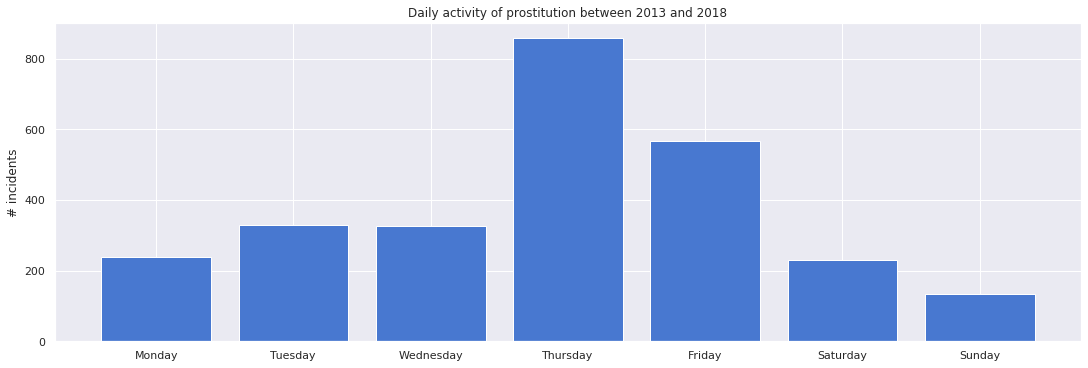

In [14]:
fig, axes = plt.subplots(figsize=(15,5), constrained_layout=True)
axes.set_title("Daily activity of prostitution between 2013 and 2018")
hourly_data = df[(df["Category"] == "PROSTITUTION")&(df["Year"]>2012)]\
                .groupby(["Day"], as_index=False)["IncidntNum"]\
                .count()\
                .values
x_values = hourly_data[:,0]
axes.bar(x_values, hourly_data[:,1], label = "Number of incidents")
axes.set_ylabel("# incidents")
axes.set_xticks(np.array([0,1,2,3,4,5,6]))
axes.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation='horizontal')
plt.show()

---
2) In the case of the **jitter plot**, a mistake could happen if a wrong-sized binning is used, that does not carefully take into account this behaviour.

An example of analysis would be a plot displaying the distribution of crimes during the day. If binning is done with a bin size smaller than 1 hour, it will result in some bins being too small due to the way policemen write the time of the incident rounded to the hour or to the half-hour most often than not.

Follows a plot to display this phenomena. The comment is at the bottom of the graph to allow easy of interpretation (without scrolling up and down)

In [8]:
# function used to bin the data handily
def bar_bin_frequency(fig, ax1, distribution, n_bins, label, step = 0.9, alpha = 1, color = "blue", plot_bins = False):
    # bin data
    dist_hist, dist_bins_raw = np.histogram(distribution, n_bins)
    # get the center of the bins
    dist_bins = (dist_bins_raw[:-1]+dist_bins_raw[1:])/2
    
    # display data
    ax1.bar(dist_bins, np.array(dist_hist)/np.max(dist_hist),\
            step*(dist_bins[1]-dist_bins[0]), align = 'center', alpha = alpha, label="{}".format(label))
    
    # plot the limits of the bins is needed
    if plot_bins:
        for pilon in dist_bins_raw:
            ax1.axvline(pilon, color=(0.2,0.2,0.2))

In [9]:
# select data
wrong_bins_df = df[(df["Category"] == "ASSAULT") & \
               (df["Year"] == 2015) & \
               (df["Month"] < 6) & \
               (df["Hour"] > 11)][["IncidntNum","Hour", "Minute"]]
wrong_bins_df_incidents = [x[1]["Hour"]*60+x[1]["Minute"] for x in wrong_bins_df.iterrows()]

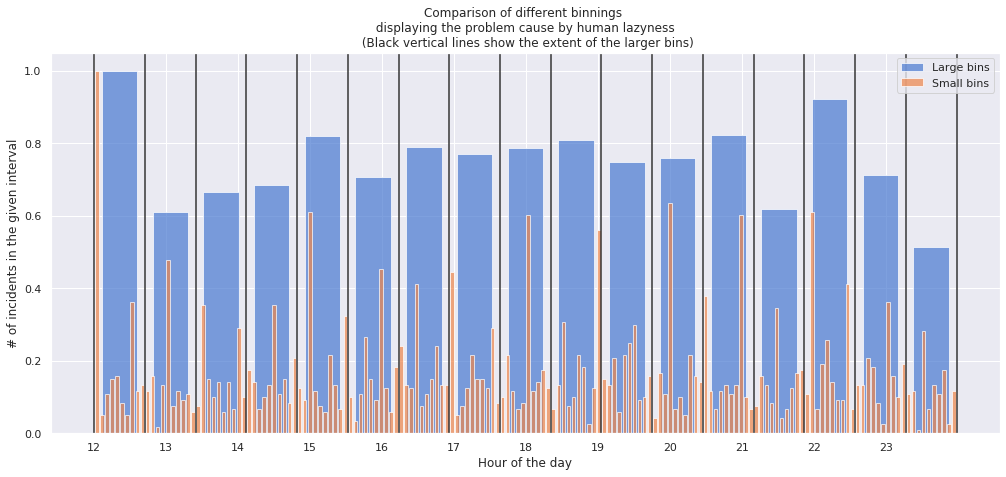

In [10]:
# plot data to show possible error
fig, ax1 = plt.subplots(figsize = (17,7))
ax1.set_title("Comparison of different binnings \n displaying the problem cause by human lazyness \n (Black vertical lines show the extent of the larger bins)")
ax1.set_ylabel("# of incidents in the given interval")
ax1.set_xlabel("Hour of the day")
ax1.xaxis.grid(True, which='major')
ax1.set_xticks(60*(np.array(range(12))+12))
ax1.set_xticklabels(np.array(range(12))+12, rotation = "horizontal")

step = 0.7
bar_bin_frequency(fig, ax1, wrong_bins_df_incidents, 17, "Large bins", step, alpha = 0.7, plot_bins = True)
bar_bin_frequency(fig, ax1, wrong_bins_df_incidents, 170, "Small bins", step, alpha = 0.7)

plt.legend()
plt.show()

We decided to plot only half the day to make the plot less cluttered.

Thanks to the black vertical lines, we can see why some rectangles are small, for example the one that goes from right after `21`, where the effect is really pronounced. The height of the rectangle is small because it misses both the `21` and `22` "hour marks", so it appears as though during that time of day there is a pronounced decrease in crime, although this effect is only caused by the way that the time is registered by policemen and by how we decided to bin the data.

An inspection of a smaller bin-size, in orange, reveals immediately the source of the effect.

---
3) The **Hall of Justice** problem was analyzed before in this assignment, here a comment on what problems might arise. 

Here the major effect can be seen if we want to effectively allocate resources using the data available. Based on these results, a non-human-supervised computer model would allocate more resources to the area around the Hall of Justice, because it sees the spike in activity. However, this would be miguided and could lead to an improrer use of resources. Therefore, a system that uses geographical data should be aware of this possible issue, even though this would result in a loss of a fairly big amount of usable data.

---
When inspecting the data we found another example of possible noise introduced in the data caused by inaccuracies in the recording of the information.

We define a rough bounding box around San Francisco and look for all the incidents recorded outside this bounding box.

In [ ]:
#define bounding box
bottom_left = [37.704845, -122.523815]
top_right = [37.838131, -122.358156]

# find all incidents outside of San Francisco
df_out_of_sf = df[(df["Lat"]<bottom_left[0]) | (df["Lat"]>top_right[0]) | (df["Lon"] < bottom_left[1]) | (df["Lon"] > top_right[1])]
out_of_sf = df_out_of_sf[["Lat", "Lon"]].values.tolist()
base_map=generateBaseMap([90,-120.5], default_zoom_start=3)
#Iterate over each coordinate to plot a circlemarker
for coord in out_of_sf:
    folium.CircleMarker(coord,radius=1,color='red').add_to(base_map)

base_map

![map6_1](https://raw.githubusercontent.com/apra/socialdataanalysis2020/master/assignment_1/data/map6_1.png)

In [15]:
# number of wrong coordinates
len(df_out_of_sf)

143

*Comment*

We can see (in red) that all these $143$ points have been put in the same location, at `90, -120.5`. Furthermore, when looking at the year when these points were collected, we can see that they are only from 2004 and 2005. This may be due to an error in the system that recorded the coordinates or that converted addresses to their location.

All the addresses are still available, so the information could be recovered that way, but if only the latitude and longitude information is used to make some historical analysis, there might be some incorrect conclusions due to assuming that all coordinates are correct.

A simple attempt to show the real locations using part of the address.

In [ ]:
import requests
from urllib.parse import quote

base_map=generateBaseMap()

for row in df_out_of_sf.iterrows():
    # use Nomination API to get the coordinates
    resp = requests.get('https://nominatim.openstreetmap.org/search?q={}+san%20francisco&format=json'.format(quote(row[1]["Address"].split("/")[0])))
    #get the json into python
    resp_json = resp.json()
    
    # if something is found, draw a dot
    if(len(resp_json) > 0):
        folium.CircleMarker([resp_json[0]["lat"],resp_json[0]["lon"]],radius=1,color='black').add_to(base_map)

base_map

![map6_2](https://raw.githubusercontent.com/apra/socialdataanalysis2020/master/assignment_1/data/map6_2.png)

*Comment*

From this we can see that the crimes are not focused on one spot, which suggest that the location issue was caused by an error that is not related to where the crime happened. This is, therefore, legitimate data that would have been lost during an analysis of the crimes that is based solely on latitude and longitude.